In [21]:
import numpy as np
import tensorflow as tf
import shap
import matplotlib.pyplot as plt
from interaction_effects import run_image, utils, marginal

In [2]:
from absl import app
from absl import flags

FLAGS = flags.FLAGS

flags.DEFINE_string('f', '', 'Default')
try:
    app.run(lambda x: None)
except:
    pass

In [3]:
utils.set_up_environment()

W1104 14:56:32.503515 139944406939456 module_wrapper.py:139] From /home/psturm/interaction_effects/utils.py:31: The name tf.enable_eager_execution is deprecated. Please use tf.compat.v1.enable_eager_execution instead.



In [4]:
FLAGS.dataset = 'mnist'

In [5]:
x_train, y_train, x_test, y_test = run_image.get_data()

In [6]:
model = tf.keras.models.load_model('../models/{}_model.h5'.format(FLAGS.dataset))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


W1104 14:56:34.155471 139944406939456 deprecation.py:323] From /home/psturm/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
grad_explainer = shap.GradientExplainer(model, x_train)
shap_values = grad_explainer.shap_values(x_test[:5], nsamples=400, ranked_outputs=1)

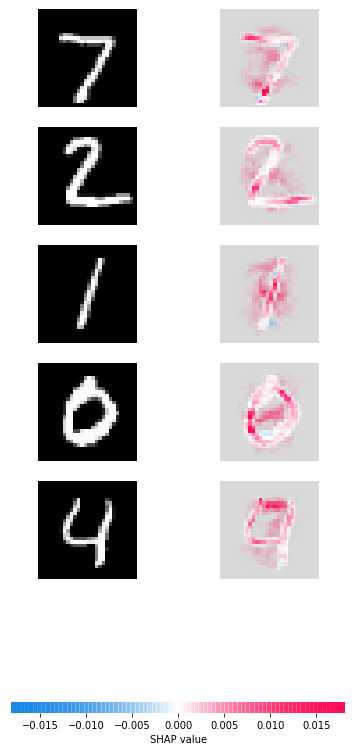

In [19]:
shap.image_plot(shap_values[0], x_test[:5])

In [22]:
primal_explainer = marginal.MarginalExplainer(model, x_train, 
                                         nsamples=200, representation='mobius')
primal_effects = primal_explainer.explain(samples, verbose=True)

NameError: name 'background' is not defined